In [46]:
import os
import cv2
import nbimporter
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from albumentations import Flip, Rotate

% matplotlib inline

In [3]:
import pandas as pd
airplane = pd.read_csv('/Volumes/JS/QuickDraw/train_simplified/airplane.csv', nrows=100)

In [43]:
drawing = airplane['drawing'][:100]
drawing = [eval(drawing[i]) for i in range(100)]
print(drawing[0])

[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, 30, 6, 1, 2, 66, 98, 253, 254, 246, 182, 165], [140, 194, 227, 232, 229, 229, 206, 124, 123, 149, 157, 159, 153, 110, 82, 77, 74, 109, 121, 127, 120]], [[207, 207, 210, 221, 238], [74, 103, 114, 128, 135]], [[119, 107, 76, 70, 49, 39, 60, 93], [72, 41, 3, 0, 1, 5, 38, 70]]]


In [33]:
def stroke_removal(drawing, percent=0.5, alpha=0.5, beta=0.5):
    num = int(len(drawing) * percent)
    pi = []
    for i, stroke in enumerate(drawing):
        pi.append(np.exp(alpha * (i+1)) / np.exp(beta * len(stroke[0])))
    pi = pi / np.array(pi).sum()
    order_to_remove = np.argsort(pi)[::-1]
    temp = [drawing[j] for j, i in enumerate(drawing) if j in order_to_remove[num:]]
    return temp

In [34]:
def drawing_to_image(drawing, H=64, W=64):

    point=[]
    time =[]
    
    for t,(x,y) in enumerate(drawing):
        point.append(np.array((x,y),np.int16).T)
        time.append(np.full(len(x),t))

    point = np.concatenate(point).astype(np.int16)
    time  = np.concatenate(time).astype(np.int32)
    
    coords = []
    
    image  = np.full((H,W,3),0,np.uint8)
    x_max = point[:,0].max()
    x_min = point[:,0].min()
    y_max = point[:,1].max()
    y_min = point[:,1].min()
    w = x_max-x_min
    h = y_max-y_min
    print(w,h)

    s = max(w,h)
    norm_point = (point-[x_min,y_min])/s
    norm_point = (norm_point-[w/s*0.5,h/s*0.5])*max(W,H)*0.85
    norm_point = np.floor(norm_point + [W/2,H/2]).astype(np.int16)

    T = time.max()+1
    for t in range(T):
        p = norm_point[time==t]
        x,y = p.T
        image[y,x]=255
        N = len(p)
        for i in range(N-1):
            x0,y0 = p[i]
            x1,y1 = p[i+1]
            coords.append((x0, y0))
            cv2.line(image,(x0,y0),(x1,y1),(255,255,255),1,cv2.LINE_AA)
        coords.append((x1, y1))

    return image, coords

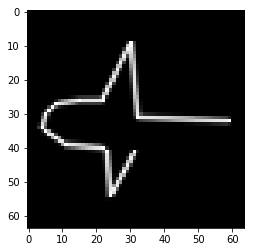

In [97]:
img, _ = drawing_to_image(drawing[3])
plt.imshow(img.astype('uint8'))

In [98]:
from albumentations import *

In [99]:
new_img = GridDistortion(p=1)(image=img)['image']

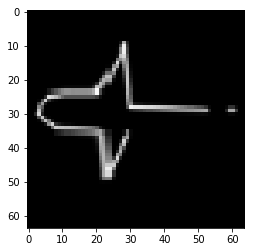

In [100]:
plt.imshow(new_img.astype('uint8'))